In [1]:
# Ahmet Berkay Aslan c1911009
# Berkay Demir       c1911022
# Buğra Mutluer      c1911040

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")#ingore the warning

In [2]:
data = pd.read_csv('insurance.csv') # import data as dataframe.
data

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,18.0,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


In [3]:
data.info() # checking Data type of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1336 non-null   float64
 1   sex       1336 non-null   object 
 2   bmi       1336 non-null   float64
 3   children  1337 non-null   float64
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [4]:
data.isna().sum()

age         2
sex         2
bmi         2
children    1
smoker      1
region      1
charges     0
dtype: int64

# Detecting null rows

In [5]:
data[data.isnull().any(axis=1)].style.highlight_null('yellow')


,age,sex,bmi,children,smoker,region,charges
56,58.000000,female,nan,2.000000,no,northeast,13607.368750
289,52.000000,male,26.400000,3.000000,no,nan,25992.821040
483,51.000000,female,39.500000,nan,no,southwest,9880.068000
534,nan,male,40.480000,0.000000,no,southeast,13831.115200
586,21.000000,nan,20.235000,3.000000,no,northeast,3861.209650
626,36.000000,male,nan,3.000000,no,northeast,6748.591200
669,40.000000,nan,29.810000,1.000000,no,southeast,6500.235900
725,nan,female,39.050000,3.000000,yes,southeast,40932.429500
1016,19.000000,female,24.605000,1.000000,nan,northwest,2709.243950


# Cleaning NaN rows


In [6]:
first = data.shape[0]
data = data.dropna()#cleaning NaN rows
last = data.shape[0]
print("Deleted " + str(first-last) + " rows")

Deleted 9 rows


In [7]:
data.isna().sum() # check again there is any null value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

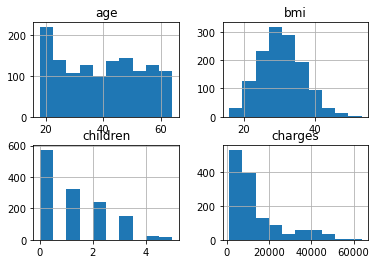

In [8]:
data.hist()

In [9]:
data

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,18.0,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


# cleaning duplicated rows

In [10]:
print("Numbers of duplicated rows :",data.duplicated().sum()) # find for duplicated rows. 

Numbers of duplicated rows : 1


In [11]:
data.loc[data.duplicated(keep = False), :] # founding the duplicated rows.

,age,sex,bmi,children,smoker,region,charges
195,19.0,male,30.59,0.0,no,northwest,1639.5631
581,19.0,male,30.59,0.0,no,northwest,1639.5631


In [12]:
data=data.drop_duplicates(keep="first") # delete the duplicated row.
print("After removing,now number of duplicated rows are:",data.duplicated().sum())

After removing,now number of duplicated rows are: 0


In [13]:
data.shape

(1328, 7)

# outlier detection
### There, print some outliers but we think they are normal in medical dataset

In [14]:

# Calculate summary statistics for each column
summary = data.describe()

print(summary)
print()

# Loop through each column in the summary statistics
for column in summary:
    # Get the mean and standard deviation of the column
    mean = summary[column]['mean']
    std = summary[column]['std']
    
    # Identify any values in the column that are more than 3 standard deviations from the mean
    outliers = data[column][(data[column] > mean + 3*std) | (data[column] < mean - 3*std)]
    
    # Print the values that were identified as outliers
    print(outliers)
    print()


               age          bmi     children       charges
count  1328.000000  1328.000000  1328.000000   1328.000000
mean     39.208584    30.659827     1.090361  13275.694536
std      14.035460     6.095602     1.204474  12113.240428
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.272500     0.000000   4744.325050
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.681250     2.000000  16687.364100
max      64.000000    53.130000     5.000000  63770.428010

Series([], Name: age, dtype: float64)

116     49.06
847     50.38
1047    52.58
1317    53.13
Name: bmi, dtype: float64

32      5.0
71      5.0
166     5.0
413     5.0
425     5.0
438     5.0
568     5.0
640     5.0
877     5.0
932     5.0
937     5.0
969     5.0
984     5.0
1085    5.0
1116    5.0
1130    5.0
1245    5.0
1272    5.0
Name: children, dtype: float64

34      51194.55914
543     63770.42801
577     58571.07448
819     55135.40209
1146    52590.8293

<AxesSubplot:xlabel='region', ylabel='charges'>

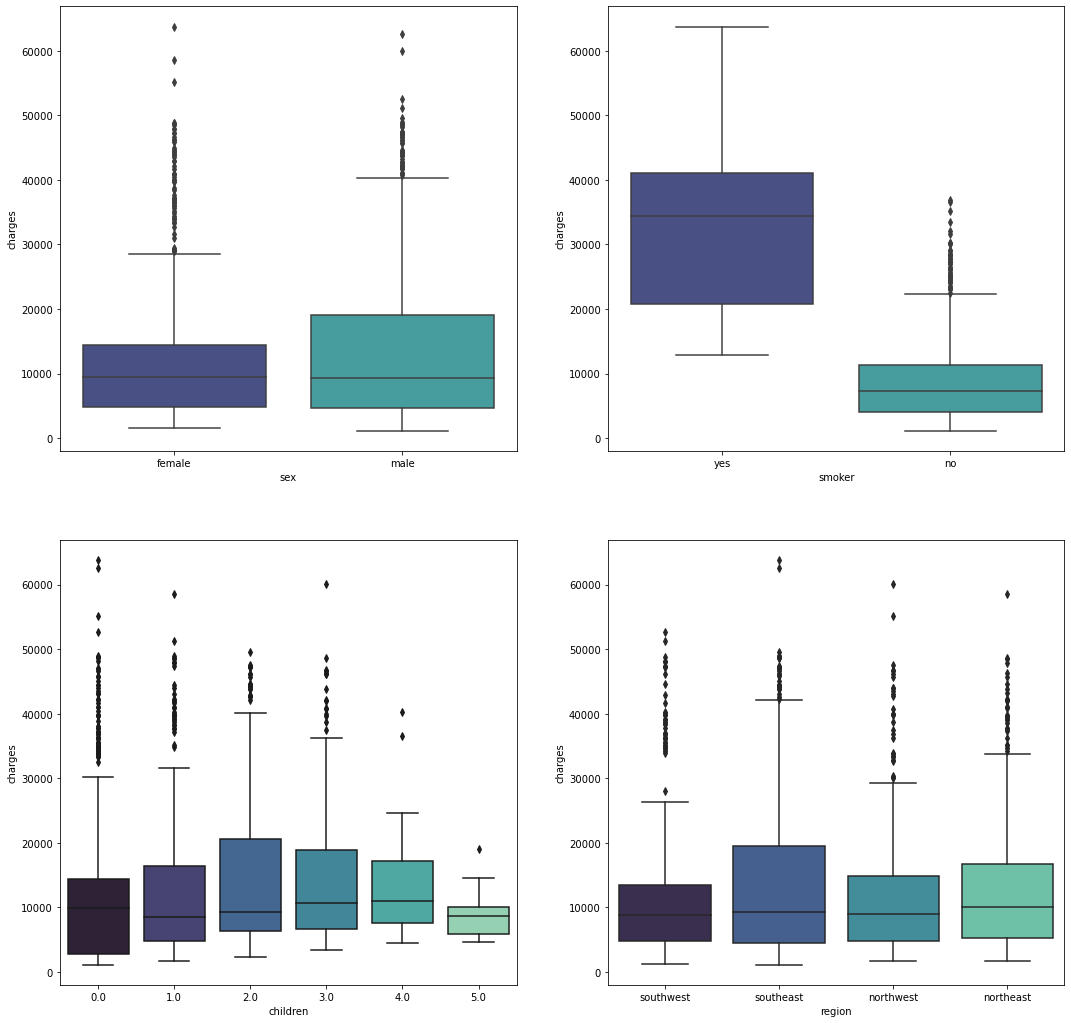

In [15]:
fig, ((ax1, ax2) ,(ax3,ax4)) = plt.subplots(2,2, figsize=(18,18)) #checking for outliers
                                                          
sns.boxplot(data=data, x="sex", y="charges",palette='mako',ax=ax1)
sns.boxplot(data=data, x="smoker", y="charges",palette='mako',ax=ax2)
sns.boxplot(data=data, x="children", y="charges",palette='mako',ax=ax3)
sns.boxplot(data=data, x="region", y="charges",palette='mako',ax=ax4)

# Exploratory Data Analysis (EDA)

In [16]:
print('Skewness:',data["charges"].skew())  # ckecking skewness.
print('Kurtosis:',data["charges"].kurt())  # ckecking kurtosis.

Skewness: 1.5167171889850006
Kurtosis: 1.610557476119678


count     1328.000000
mean     13275.694536
std      12113.240428
min       1121.873900
25%       4744.325050
50%       9382.033000
75%      16687.364100
max      63770.428010
Name: charges, dtype: float64

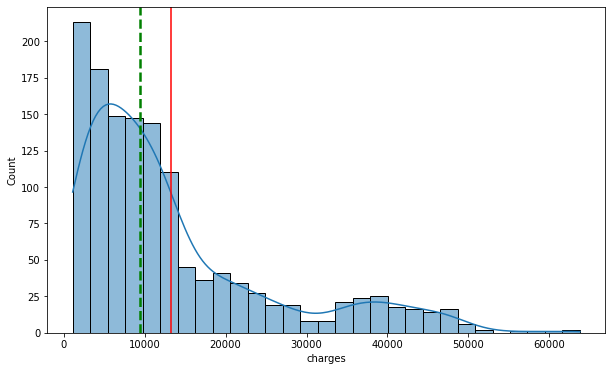

In [17]:
plt.figure(figsize=(10,6))  

sns.histplot(data=data, x="charges", kde=True)    # distribution plot for our target variable charges. 
plt.axvline(x=data.charges.mean(),color='red')
plt.axvline(x=data.charges.median(),color='green',ls='--',lw=2.5) 

data["charges"].describe()

<AxesSubplot:xlabel='charges', ylabel='Count'>

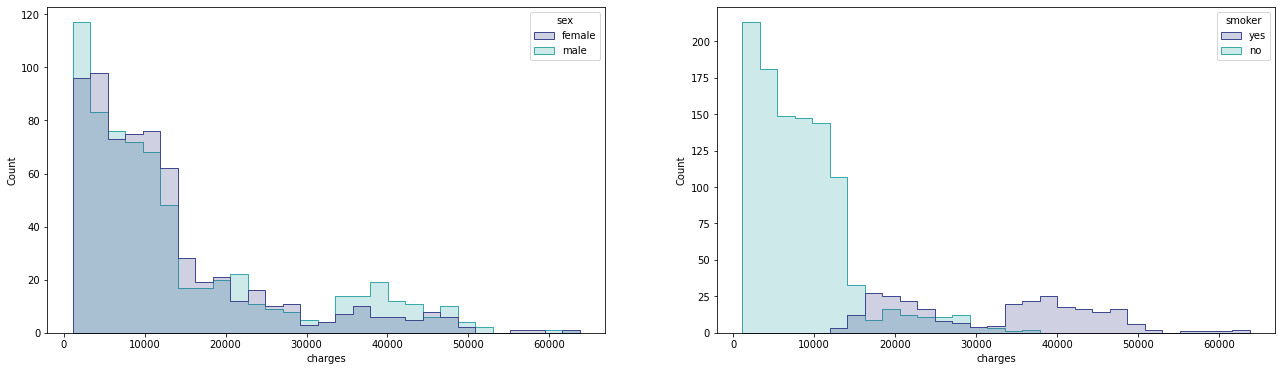

In [18]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(22,6))

sns.histplot(data=data, x="charges",hue ='sex',element = 'step',palette='mako',ax=ax1)  # histogram of our target variable charges, with hue Sex variable.
sns.histplot(data=data, x="charges",hue = 'smoker',element = 'step',palette='mako',ax=ax2) # histogram of our target variable charges, with hue Smoker variable.

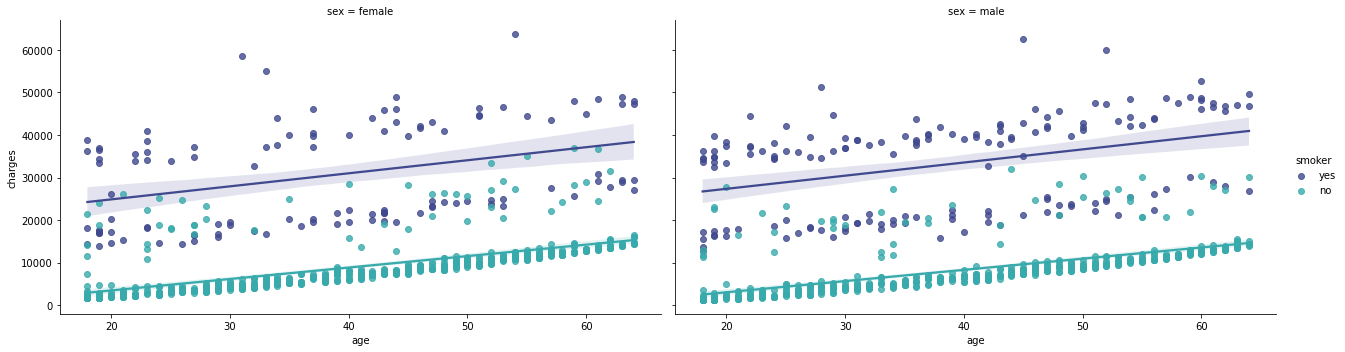

In [19]:
sns.lmplot(data=data, x="age", y="charges",hue="smoker", col="sex", height=5, aspect=1.8,palette='mako') # scatter plot between chargers and age  with hue smoker. 
plt.show()

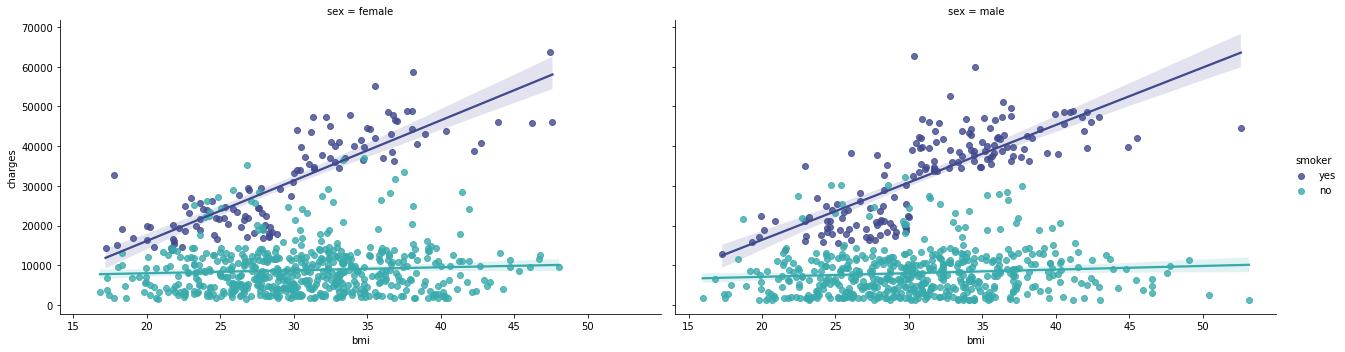

In [20]:
sns.lmplot(data=data, x="bmi", y="charges",hue="smoker", col="sex", height=5, aspect=1.8,palette='mako') # scatter plot between chargers and bmi  with hue smoker.

plt.show()

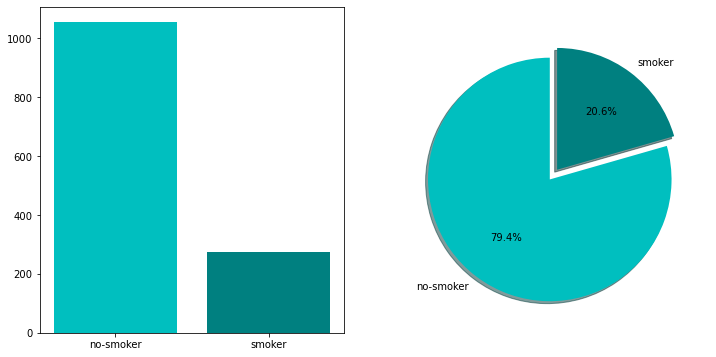

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6)) 


count = data['smoker'].value_counts()
perc  = (count/len(data))*100


labels = ['no-smoker','smoker']
colors = ['c','teal']
bsizes = [count[0],count[1]]
sizes = [perc[0],perc[1]]

ax1.bar(labels,bsizes,label=labels, color=colors)

explode = (0.1, 0)  
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors = colors)

def reset(event):
    circle1.remove()

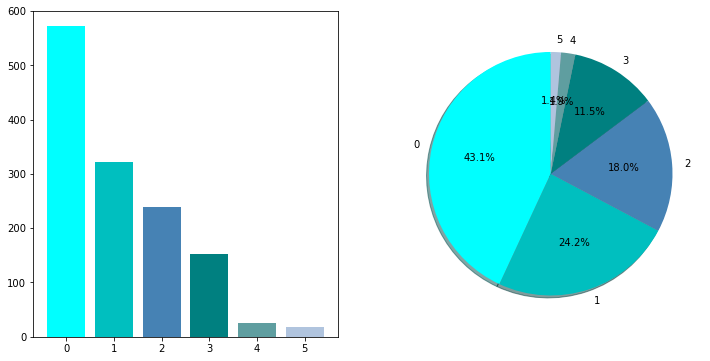

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

count = data['children'].value_counts()
perc  = (count/len(data))*100


labels = ['0','1','2','3','4','5']
colors = ['cyan','c', 'steelblue', 'teal', 'cadetblue', 'lightsteelblue']
bsizes = [count[0],count[1],count[2],count[3],count[4],count[5]]
sizes = [perc[0],perc[1],perc[2],perc[3],perc[4],perc[5]]

ax1.bar(labels,bsizes,label=labels,color=colors)

explode = (0,0,0,0,0,0)  
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors = colors)

def reset(event):
    circle1.remove()

# Feature engineering


In [24]:
from sklearn.preprocessing import LabelEncoder  #encoding (we convert categorical variables into Numeric)

lb=LabelEncoder()

#data['age'] = lb.fit_transform(data['age'])
data['age']=data['age'].astype(int)
data['children']=data['children'].astype(int)
data['sex'] = lb.fit_transform(data['sex'])# 0 = female , 1 = male
data['smoker'] = lb.fit_transform(data['smoker'])# 1 = smoker , 0 = not

data['region'] = lb.fit_transform(data['region'])

data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
StandardScaler(copy = True, with_mean = True, with_std = True)
scaled_data  = scaler.transform(data)
scaled_data.sum()

-4.884981308350689e-13

In [26]:
scaled_data.shape

(1328, 7)

# Dimensionality Reduction

### correlation

In [27]:
data.corr().style.background_gradient(cmap='GnBu')

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020714,0.105354,0.043817,-0.024031,-0.000597,0.299171
sex,-0.020714,1.000000,0.048996,0.016721,0.078492,0.006650,0.059044
bmi,0.105354,0.048996,1.000000,0.015457,0.001508,0.154339,0.196458
children,0.043817,0.016721,0.015457,1.000000,0.006703,0.019765,0.065402
smoker,-0.024031,0.078492,0.001508,0.006703,1.000000,-0.003757,0.787362
region,-0.000597,0.006650,0.154339,0.019765,-0.003757,1.000000,-0.008873
charges,0.299171,0.059044,0.196458,0.065402,0.787362,-0.008873,1.000000


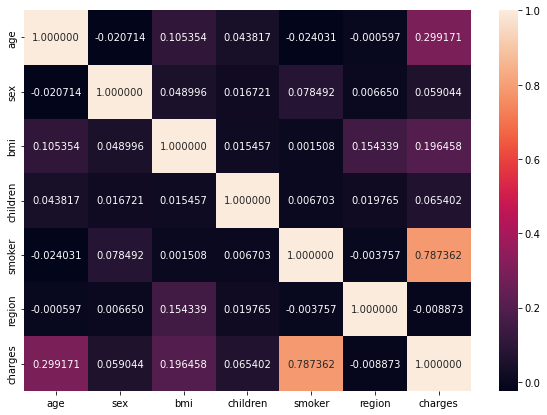

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))

dataplot = sns.heatmap(data.corr(), annot=True, fmt='.6f')

# Pearson's correlation

In [29]:
X = data.drop("charges",axis=1)   #Feature Matrix
y = data["charges"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape


X_train.corr()

,age,sex,bmi,children,smoker,region
age,1.000000,-0.014505,0.092060,0.045282,-0.051733,0.004856
sex,-0.014505,1.000000,0.046010,0.030485,0.048137,-0.021331
bmi,0.092060,0.046010,1.000000,0.003789,0.002054,0.158205
children,0.045282,0.030485,0.003789,1.000000,0.018755,0.042116
smoker,-0.051733,0.048137,0.002054,0.018755,1.000000,-0.012936
region,0.004856,-0.021331,0.158205,0.042116,-0.012936,1.000000


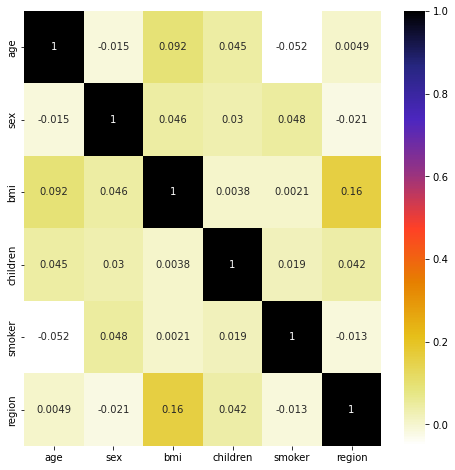

In [30]:
import seaborn as sns
plt.figure(figsize=(8,8))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [31]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr




In [32]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

0

## Finding the Most Influencing Feature

In [33]:
a=data.drop(['charges'],axis=1)
b=data.charges

In [34]:
a

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [35]:
b

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1328, dtype: float64

In [36]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(a, b)

ExtraTreesRegressor()

In [37]:
print(selection.feature_importances_)

[0.1288474  0.00983862 0.19414974 0.0245127  0.62077169 0.02187984]


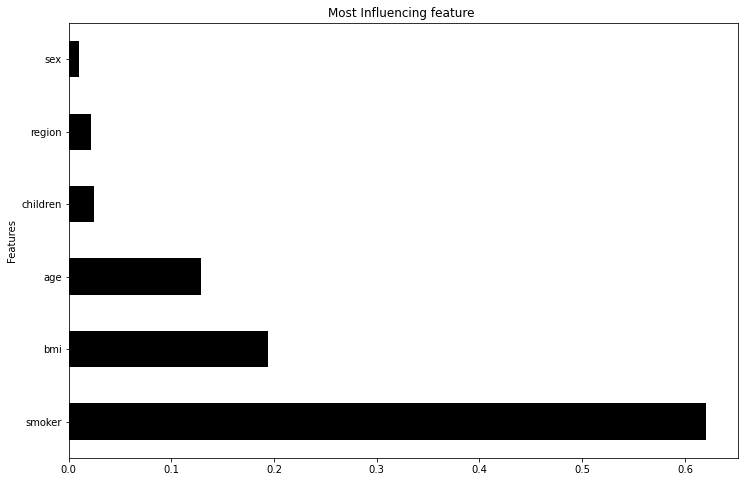

In [38]:
plt.figure(figsize = (12,8))
plt.title("Most Influencing feature ")
plt.ylabel('Features')
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',color='black')
plt.show()

# smoker > bmi > age > children > regionn > sex
# which mean most important feature is smoker

# MSE

In [39]:
X = data.iloc[:,0:6]
y = data.iloc[:,-1]

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [42]:
mse_values = []
for feature in X_train.columns:
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))
    

In [43]:
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending=True)

region      2.478075e+07
smoker      2.487876e+07
bmi         2.508417e+07
age         2.511344e+07
sex         2.512167e+07
children    2.527867e+07
dtype: float64

<AxesSubplot:>

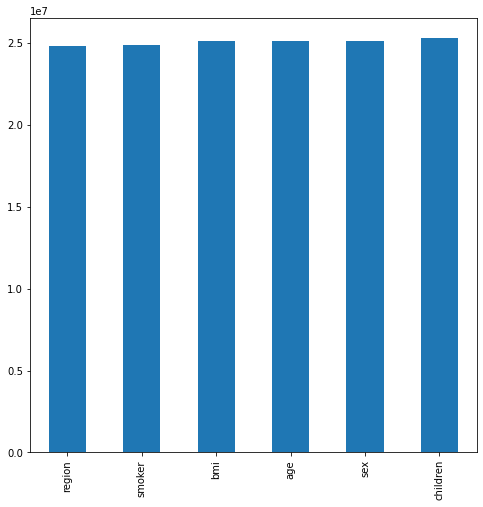

In [44]:
mse_values.sort_values(ascending=True).plot.bar(figsize = (8,8))

# linear regression

In [45]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

model = LinearRegression()

model.fit(X, y)

y_predict = model.predict(X)

r_square = model.score(X, y)
print("R square :", r_square)


R square : 0.7506697538555692


# polynomial regression

In [46]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()

model.fit(X_poly, y)

y_predict = model.predict(X_poly)

r_square = model.score(X_poly, y)
print("R square :", r_square)


R square : 0.8148616339495293


## linear and polynomial regression with deleting 3 features

In [47]:
a = data.drop(['sex'],axis=1)
a = a.drop(['region'],axis=1)
a = a.drop(['children'],axis=1)

In [67]:
a.head()

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [48]:
X = a.iloc[:, :-1]
y = a.iloc[:, -1]

model = LinearRegression()

model.fit(X, y)

y_predict = model.predict(X)

r_square = model.score(X, y)
print("R square :", r_square)
print("Old R square : 0.7506697538555692")

R square : 0.7476294541623101
Old R square : 0.7506697538555692


In [49]:
X = a.iloc[:, :-1]
y = a.iloc[:, -1]

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()

model.fit(X_poly, y)

y_predict = model.predict(X_poly)

r_square = model.score(X_poly, y)
print("R square :", r_square)
print("Old R square : 0.8148616339495293")

R square : 0.8389222946229109
Old R square : 0.0.8148616339495293


# Machine Learning Models

In [50]:
from sklearn.metrics import mean_squared_error as mse # library for Mean squared error regression loss.
from sklearn import metrics #accuracy score,MAE,MSE,RMSQE
from yellowbrick.regressor import prediction_error # Visualize the prediction error
from yellowbrick.regressor import residuals_plot # Visualize the residuals between predicted and actual data 
from yellowbrick.model_selection import LearningCurve # Visualize Learning Curve

## LinearRegression


In [51]:
from sklearn.linear_model import LinearRegression  # importing Linear Regression.

regressor = LinearRegression() 
regressor.fit(X_train,y_train) # Fit the training data to LinearRegression model.

predictions=regressor.predict(X_test) # make prediction with our testing data.

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)) # Mean Absolute Error. 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  # Mean Squared Error.
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) # Root Mean Squared Error.

print('Training Score:',regressor.score(X_train, y_train)) # accuracy score for Training data.
print('Testing Score:',regressor.score(X_test, y_test)) # accuracy score for Testing data.


Mean Absolute Error: 4137.41080616566
Mean Squared Error: 38219054.147300735
Root Mean Squared Error: 6182.156108292699
Training Score: 0.7616696125294744
Testing Score: 0.731632266758504


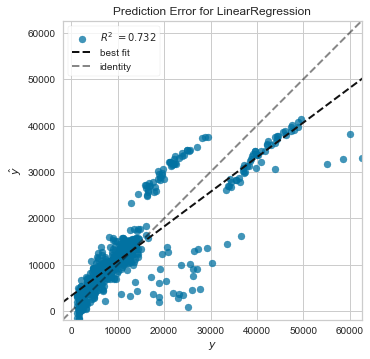

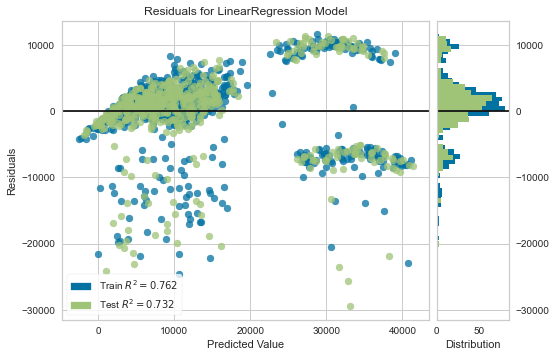

In [52]:
visualizer = prediction_error(regressor, X_train, y_train, X_test, y_test) #Prediction Error Plot.
    
viz = residuals_plot(regressor, X_train, y_train, X_test, y_test) # Residuals Plot.


### 1.A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model
### 2.Residuals, in the context of regression models, are the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

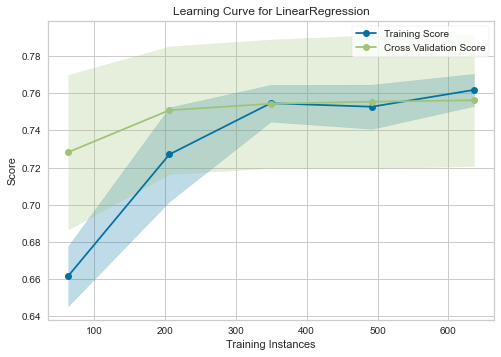

<AxesSubplot:title={'center':'Learning Curve for LinearRegression'}, xlabel='Training Instances', ylabel='Score'>

In [53]:
visualizer = LearningCurve(regressor, scoring='r2') #Learning Curve function.

visualizer.fit(X_train, y_train)  # Fit the data to the visualizer.     
visualizer.show()     # Finalize and render the figure.

### A learning curve shows the relationship of the training score versus the cross validated test score for an estimator with a varying number of training samples. This visualization is typically used to show two things:

### 1. How much the estimator benefits from more data (e.g. do we have “enough data” or will the estimator get better if used in an online fashion).
### 2. If the estimator is more sensitive to error due to variance vs. error due to bias.

## LinearRegression COST PREDICTION

In [54]:
prediction_data = (19,0,27.9,0,1,3)
prediction_data_array = np.asarray(prediction_data)
prediction_data_reshape = prediction_data_array.reshape(1,-1)
prediction = regressor.predict(prediction_data_reshape)
print('The insurance cost prediction is: ',prediction[0])
print('The real insurance  cost is: 16884.924')

The insurance cost prediction is:  24601.804100013193
The real insurance  cost is: 16884.924


In [55]:
prediction_data = (32,1,28.88,0,0,1)
prediction_data_array = np.asarray(prediction_data)
prediction_data_reshape = prediction_data_array.reshape(1,-1)
prediction = regressor.predict(prediction_data_reshape)
print('The insurance cost prediction is: ',prediction[0])
print('The real insurance  cost is: 3866.8552')

The insurance cost prediction is:  5714.734547769263
The real insurance  cost is: 3866.8552


# RandomForestRegressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print('Training Score:',regressor.score(X_train, y_train))
print('Testing Score:',regressor.score(X_test, y_test))

Mean Absolute Error: 2788.3846350535714
Mean Squared Error: 25892652.48667555
Root Mean Squared Error: 5088.482336284125
Training Score: 0.9738055609966534
Testing Score: 0.8181861741350901


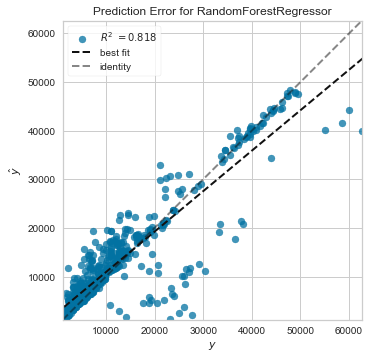

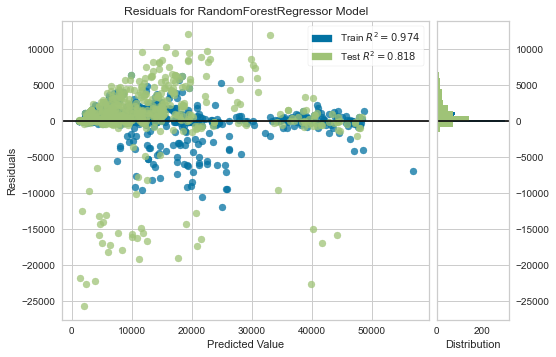

In [57]:
visualizer = prediction_error(regressor, X_train, y_train, X_test, y_test)

viz = residuals_plot(regressor, X_train, y_train, X_test, y_test)

## 1.A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model
## 2.Residuals, in the context of regression models, are the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

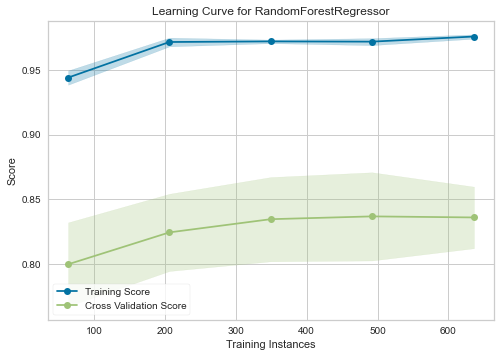

<AxesSubplot:title={'center':'Learning Curve for RandomForestRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [58]:
visualizer = LearningCurve(regressor, scoring='r2')

visualizer.fit(X_train, y_train)       
visualizer.show()     

### A learning curve shows the relationship of the training score versus the cross validated test score for an estimator with a varying number of training samples. This visualization is typically used to show two things:

### 1. How much the estimator benefits from more data (e.g. do we have “enough data” or will the estimator get better if used in an online fashion).
### 2. If the estimator is more sensitive to error due to variance vs. error due to bias.

## RandomForestRegressor COST PREDICTION

In [59]:
prediction_data = (19,0,27.9,0,1,3)
prediction_data_array = np.asarray(prediction_data)
prediction_data_reshape = prediction_data_array.reshape(1,-1)
prediction = regressor.predict(prediction_data_reshape)
print('The insurance cost prediction is: ',prediction[0])
print('The real insurance  cost is: 16884.924')

The insurance cost prediction is:  17068.6602015
The real insurance  cost is: 16884.924


In [60]:
prediction_data = (32,1,28.88,0,0,1)
prediction_data_array = np.asarray(prediction_data)
prediction_data_reshape = prediction_data_array.reshape(1,-1)
prediction = regressor.predict(prediction_data_reshape)
print('The insurance cost prediction is: ',prediction[0])
print('The real insurance  cost is: 3866.8552')

The insurance cost prediction is:  5085.558999000002
The real insurance  cost is: 3866.8552


# GradientBoostingRegressor 

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
predictions=reg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print('Training Score:',reg.score(X_train, y_train))
print('Testing Score:',reg.score(X_test, y_test))

Mean Absolute Error: 2686.558906655967
Mean Squared Error: 24522151.936721195
Root Mean Squared Error: 4951.98464625257
Training Score: 0.9187441134241544
Testing Score: 0.8278095971685313


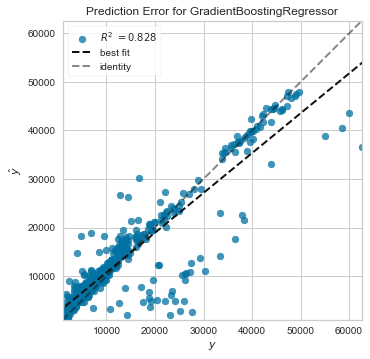

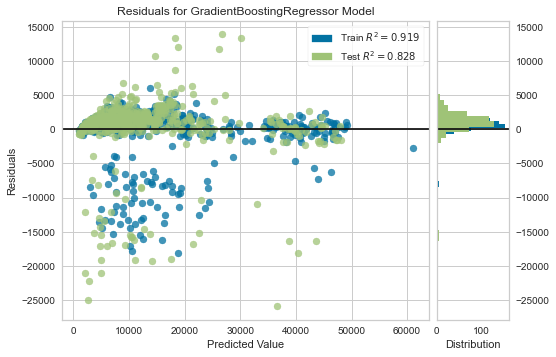

In [62]:
visualizer = prediction_error(reg, X_train, y_train, X_test, y_test)

viz = residuals_plot(reg, X_train, y_train, X_test, y_test)

### 1.A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model
### 2.Residuals, in the context of regression models, are the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

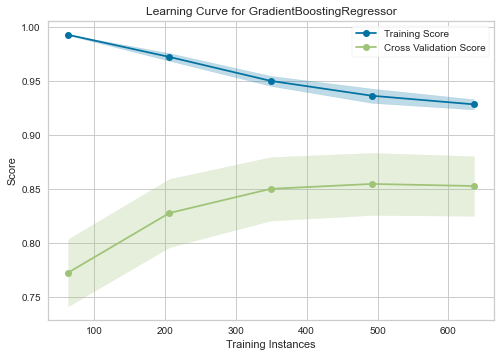

<AxesSubplot:title={'center':'Learning Curve for GradientBoostingRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [63]:
visualizer = LearningCurve(reg, scoring='r2')

visualizer.fit(X_train, y_train)    
visualizer.show()     

### A learning curve shows the relationship of the training score versus the cross validated test score for an estimator with a varying number of training samples. This visualization is typically used to show two things:

### 1. How much the estimator benefits from more data (e.g. do we have “enough data” or will the estimator get better if used in an online fashion).
### 2. If the estimator is more sensitive to error due to variance vs. error due to bias.

## GradientBoostingRegressor COST PREDICTION

In [64]:
prediction_data = (19,0,27.9,0,1,3)
prediction_data_array = np.asarray(prediction_data)
prediction_data_reshape = prediction_data_array.reshape(1,-1)
prediction = reg.predict(prediction_data_reshape)
print('The insurance cost prediction is: ',prediction[0])
print('The real insurance  cost is: 16884.924')

The insurance cost prediction is:  17713.87363021824
The real insurance  cost is: 16884.924


In [65]:
prediction_data = (32,1,28.88,0,0,1)
prediction_data_array = np.asarray(prediction_data)
prediction_data_reshape = prediction_data_array.reshape(1,-1)
prediction = reg.predict(prediction_data_reshape)
print('The insurance cost prediction is: ',prediction[0])
print('The real insurance  cost is: 3866.8552')

The insurance cost prediction is:  4350.600830810343
The real insurance  cost is: 3866.8552
